**Comparativa entre métodos para encontrar mínimos de una función 1D**

In [141]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
import math

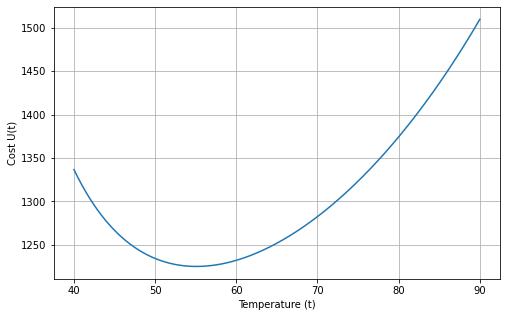

In [142]:
#Definición de la función:
U = lambda t: ((204165.5)/(330-2*t)+(10400/(t-20)))
t = np.linspace(40,90,10000)
fu = U(t)
fig1 = plt.figure(figsize=(8,5))
plt.plot(t,fu)
plt.xlabel('Temperature (t)')
plt.ylabel('Cost U(t)')
plt.grid(True)
plt.show()

**Newton Rapson**

In [143]:
def NewtonRapson():
    DerivadaAproximada = lambda x, dx: (U(x+dx)-U(x-dx))/(2*dx)
    dx = 0.01
    dan = DerivadaAproximada(t,dx)

    #Metodo de Newton-Raphson
    f = U #Funcion original
    Derivada1Aproximada = lambda x, dx: (f(x+dx)-f(x-dx))/(2*dx) #Derivada aproximada
    Derivada2Aproximada = lambda x, dx: (f(x+dx)-2*f(x)+f(x-dx))/(dx**2) #Derivada aproximada
    dx = 0.01 #valor delta para aproximacion de la delta 
    x1 = 40 #Punto de partida
    pasosMax = 100
    epsilon = 0.0001 #Definimos un epsilon, para checar el valor aumenta o no
    #print(xi) #Imprimir el punto x1
    i = 0

    #fig1, ax = plt.subplots(2)
    #print("xi\t\tf(xi)\t\tdx(xi)\t\td2x(xi)")
    
    while(True):
        tan = f(x1)+Derivada1Aproximada(x1,dx)*(t-x1)
        # ax[0].cla() 
        # ax[1].cla()
        # ax[0].plot(t,fu)
        # ax[0].plot(t,tan)
        # ax[0].plot(55.08352958,1225.16563688, marker="o", color="blue")
        # #ax[0].xlabel('Temperature (t)')
        # #ax[0].ylabel('Cost U(t)')
        # ax[0].grid(True)
        
        # ax[0].plot(x1,f(x1), marker="o", color="red")
        
        # ax[1].grid(True)
        # ax[1].plot(t,Derivada1Aproximada(t,dx),color="cyan")
        # ax[1].plot(x1,Derivada1Aproximada(x1,dx), marker="o", color="red")
        
        # plt.pause(2.8)
        
        # print("{:.8f}\t{:.8f}\t{:.8f}\t{:.8f}".format(x1, f(x1), Derivada1Aproximada(x1,dx), Derivada2Aproximada(x1,dx)))
        #evaluamos si el denominador de la fraccion nos da 0
        if(Derivada2Aproximada(x1,dx)==0):
            print("Error Matematico hay division entre cero")
            break
        
        #Newton-Rapshon
        xi = x1 - Derivada1Aproximada(x1,dx)/Derivada2Aproximada(x1,dx) #Formula de xn+1 = xn - f(xn)/f'(xn) si f'(xn) diferente de 0
        
        #No convergio el algoritmo
        i = i + 1
        if(i>pasosMax):
            print('No covergio')
            break
        
        #Error Tolerable
        #Evaluamos si la diferencia entre el valor del punto actual X respecto a epsilon es menor que epsilon
        if(abs(xi-x1)<epsilon): #Evaluamos si hay o no cambio significativo abs(xactual - xanterior)<=epsilon
            #print(xi) #Imprimir el valor final de la raiz
            break
        x1 = xi #actualizamos el x1 ahora
        
    print("T=",x1)
    print("U(t)=",U(x1))
    print("Iteraciones: %d" % i)


    plt.show()

**Secante**

In [144]:
def Secante():
    f = U
    dx = 0.01 #valor delta para aproximacion de la delta 
    x0 = 40  #Punto de partida
    x1= 90
    #t = np.linspace(40,90,500)
    ft = f(t)
    # fig1 = plt.figure(figsize=(8,5))
    # plt.plot(t,ft)
    danalitica = lambda x: (91682.75*x*x - 651310*x - 242306900)/(((x-20)**2)*((x-165)**2))
    daprox = lambda x, dx: (f(x+dx)-f(x-dx))/(2*dx) ###

    fd1 = daprox(t,dx)

    y_fd1 = danalitica(t) 

    # plt.plot(t,fd1)
    # plt.plot(t,y_fd1)
    pasosMax = 100
    error = 0.0001
    #start_time = time()
    i = 0

    while(True):
        
        if(daprox(x1,dx)==0):
            #print("Estas en el minimo")
            break
        
        #secante
        xi = x1 - daprox(x1,dx)*(x0-x1)/(daprox(x0,dx)-daprox(x1,dx)) #Formula 
        

        i = i + 1
        if(i>pasosMax):
            print('No covergio')
            break
    
        if(abs(xi-x1)<error):
        
            break
        x0 = x1
        x1 = xi #actualizamos el x1 ahora
        

    #elapsed_time = (time() - start_time)*1000
    # print("Tiempo transcurrido: %f ms" % elapsed_time)
    # print("Iteraciones: %f " % i)
    print("Valor x1: %f " % x1)
    print("Valor x0: %f " % x0)
    print("U(t)=",U(x1))
    # plt.plot(t,ft)
    # plt.plot(x1,f(x1), marker="o", color="red")


**Fuerza Bruta**


In [145]:
def FuerzaBruta():
    #startTime = time()  #Para evaluar el tiempo de cómputo
    min=np.Infinity     #Empezar por un valor grande
    tiempo = 0

    for i in t:
        if U(i)<min:
            min = U(i)
            tiempo = i

    #elapsedTime=(time()-startTime)*1000
    #print("Tiempo transcurrido = " + str(elapsedTime))
    #print("x= = ",min)
    print("T = ",tiempo)
    print("U(t)=",U(tiempo))

**Polinomial Cúbico**

In [146]:
def PolynomialCub():
    def d_C (x, deltax):
        a_c = (U(x+deltax)-U(x-deltax))/(2*deltax)
        return a_c
    def alpha (x1,x2):
        a = (x1 + x2)/2
        return a
    x1= 40
    x2= 90
    e = 0.0001
    deltax= 0.01
    al = alpha(x1,x2)
    step = 0
    #start_time = process_time_ns() 
    #definir los nuevos puntos con alpha
    #while True:
    #    step+=1
    #    if d_C(x1,deltax) * d_C( al, deltax) < 0:
    #        x2 = al
    #        break
    #    else:
    #        x1 = al
    #    al = alpha(x1,x2)

    while True:
        step+=1
        #calcular las funciones y derivadas en los respectivos puntos
        fa = U(x1)
        fb = U(x2)
        da = d_C(x1,deltax)
        db = d_C(x2,deltax)

        #Caclcular z y w para obtener u
        z = (3 * (fa-fb) )/ (x2- x1)  +  (da + db)
        w = (x2-x1)/ np.abs(x2-x1) + (np.sqrt(z**2 - (da * db)))
        u = (db + w -z)/ (db - da + (2*w))

        xm = 0
        #evaluar u para obtener valor minimo
        if u < 0:
            xm = x2
        else:
            if 0 <= u and u <= 1:
                xm = x2- u*(x2-x1)
            else:
                xm = x1

        #calcular la derivada del valor minimo para saber si convergió
        dxm = d_C(xm,deltax)
        if np.abs(dxm) < e:
            #print('Convergió')
            break
        if da * dxm < 0:
            x2 = xm
        else:
            x1 = xm
        
    #elapsed_time = (process_time_ns()   - start_time)
    print('T: ',xm)
    print("U(t)=",U(xm))
    print('Pasos: ', step)
    #print('f(x*): ', U(xm))
    #print("Tiempo transcurrido: %f ns" % elapsed_time)
    # x = np.arange(40,90)
    # fig1 = plt.figure(figsize=(8,5))
    # plt.plot(x,U(x))
    # plt.plot(xm,U(xm), marker="o", color="green")
    # plt.grid(True)
    # plt.title('Método Ajuste')
    # plt.xlabel('Temperatura (t)')
    # plt.ylabel('Costo U(t)')


**Sección Dorada**

In [147]:
def SecciónDorada():
    f = U
    dx = 0.01 #valor delta para aproximacion de la delta 

    #t = np.linspace(40,90,500)
    ft = f(t)
    # fig1 = plt.figure(figsize=(8,5))
    # plt.plot(t,ft)

    pasosMax = 30
    E = 0.0001
    aurea = 0.6180339
    xL = 40  #Punto de partida
    xU = 90

    for i in range(pasosMax):
        d = aurea*(xU-xL)
        x2 = xL+d
        x1 = xU-d
        if f(x1)<f(x2):
            xL = xL
            xU = x2
        else:
            xU=xU
            xL=x1
            
        #print("d=",d,"\nx1=",x1,"\nx2=",x2,"\nxU=",xU,"\nxL",xL)

        #Si el delta es cercano a un valor de tolerancia detener el ciclo
        if d<=E:
            break

    print("d=",d,"\nx1=",x1,"\nx2=",x2)
    print("U(t)=",U(x1))

In [148]:
def Test(Método):
    start_time = time()
    Método()
    elapsed_time = (time() - start_time)
    class bcolors:
        HEADER = '\033[95m'
        OKBLUE = '\033[94m'
        OKCYAN = '\033[96m'
        OKGREEN = '\033[92m'
        WARNING = '\033[93m'
        FAIL = '\033[91m'
        ENDC = '\033[0m'
        BOLD = '\033[1m'
        UNDERLINE = '\033[4m'

    print("Tiempo transcurrido: ",bcolors.OKGREEN,elapsed_time,bcolors.ENDC)
    #print("Tiempo transcurrido: ",elapsed_time)
    return elapsed_time
    

FuerzaBruta :
T =  55.08150815081508
U(t)= 1225.1656381760192
Tiempo transcurrido:   0.025164127349853516 

NewtonRapson :
T= 55.08352957211418
U(t)= 1225.1656368790013
Iteraciones: 6
Tiempo transcurrido:   0.007096052169799805 

Secante :
Valor x1: 55.083530 
Valor x0: 55.083261 
U(t)= 1225.1656368790016
Tiempo transcurrido:   0.006165981292724609 

PolynomialCub :
T:  55.0836671507791
U(t)= 1225.165636885099
Pasos:  14
Tiempo transcurrido:   0.0011868476867675781 

SecciónDorada :
d= 7.035813696565955e-05 
x1= 55.083505618262826 
x2= 55.083532492663416
U(t)= 1225.1656368791691
Tiempo transcurrido:   0.006775856018066406 



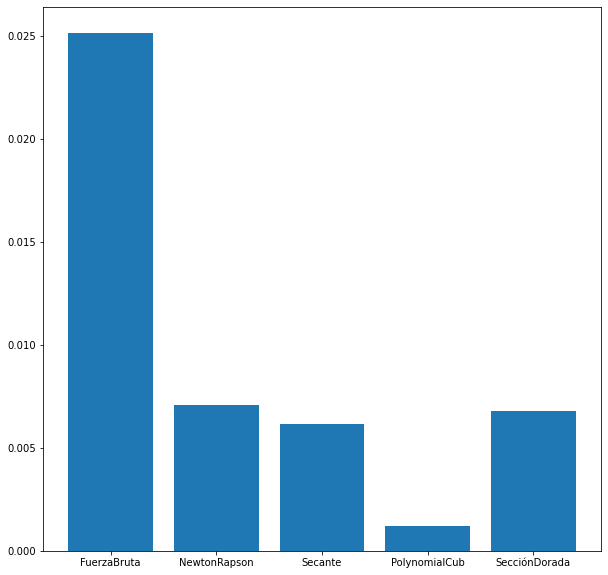

In [150]:
Methods = [FuerzaBruta,NewtonRapson,Secante,PolynomialCub,SecciónDorada]
Tiempos = {}
for m in Methods:
    print(m.__name__,":")
    tiempo = Test(m)
    Tiempos[m.__name__]=tiempo
    print()

fig1=plt.figure(figsize = (10,10))
plt.bar(range(len(Tiempos)), list(Tiempos.values()), align='center');
plt.xticks(range(len(Tiempos)), list(Tiempos.keys()));

T =  55.08150815081508
U(t)= 1225.1656381760192
Tiempo transcurrido:   0.028052091598510742 
T= 55.08352957211418
U(t)= 1225.1656368790013
Iteraciones: 6
Tiempo transcurrido:   0.004276275634765625 
Valor x1: 55.083530 
Valor x0: 55.083261 
U(t)= 1225.1656368790016
Tiempo transcurrido:   0.0008790493011474609 
T:  55.0836671507791
U(t)= 1225.165636885099
Pasos:  14
Tiempo transcurrido:   0.0008535385131835938 
d= 7.035813696565955e-05 
x1= 55.083505618262826 
x2= 55.083532492663416
U(t)= 1225.1656368791691
Tiempo transcurrido:   0.0008852481842041016 
T =  55.08150815081508
U(t)= 1225.1656381760192
Tiempo transcurrido:   0.03004908561706543 
T= 55.08352957211418
U(t)= 1225.1656368790013
Iteraciones: 6
Tiempo transcurrido:   0.0035636425018310547 
Valor x1: 55.083530 
Valor x0: 55.083261 
U(t)= 1225.1656368790016
Tiempo transcurrido:   0.0006356239318847656 
T:  55.0836671507791
U(t)= 1225.165636885099
Pasos:  14
Tiempo transcurrido:   0.00642704963684082 
d= 7.035813696565955e-05 
x1= 

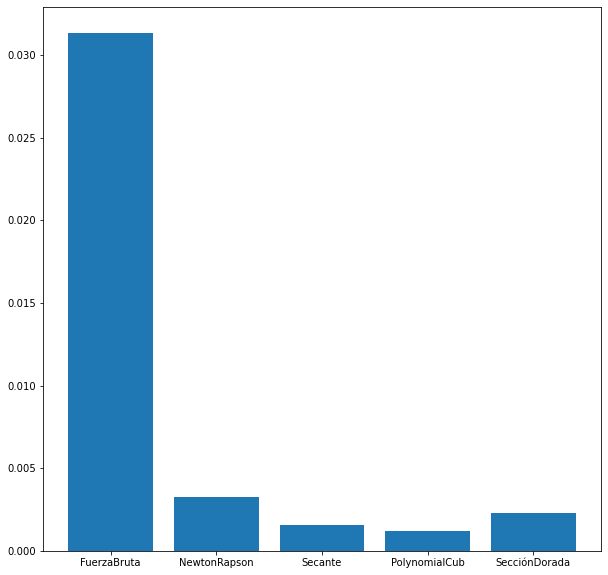

In [140]:
for i in range(100):
    for m in Methods:
        tiempo = Test(m)
        Tiempos[m.__name__]=(tiempo+Tiempos[m.__name__])/2

fig1=plt.figure(figsize = (10,10))
plt.bar(range(len(Tiempos)), list(Tiempos.values()), align='center');
plt.xticks(range(len(Tiempos)), list(Tiempos.keys()));